<a class="anchor" id="top"></a>
# Exploratory Data Analysis and Data Prep Notebook
**Authors: Ainesh Pandey, Demian Gass, Gabriel Gilling**

In this notebook, we explore features relevant to our research approach from the `nuMoM2b` dataset, perform cleaning steps, and save prepped data for modeling.

## Table of Contents

[Step 1: Import Required Packages](#step-1) <br>
[Step 2: Data Import](#step-2) <br>
[Step 3: Data Subsetting and Cleaning](#step-3) <br>
[Step 4: Save Deltas Dataframe for Modeling](#step-4) <br>

<a class="anchor" id="step-1"></a>

## Import Required Packages

If you do not have the `missingo` package installed, run the cell below. If you do have the package already, you can ignore it.

In [22]:
!pip install missingno -q

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [23]:
import pandas as pd
import numpy as np
import pickle

import re
import missingno as msno

import warnings
warnings.filterwarnings('ignore')


[Back to Top](#top)

<a class="anchor" id="step-2"></a>

## Data Import

**Raw Dataframe**: We start by importing the raw `nuMoM2b` dataset and dropping any rows/columns with 100% missing data.

In [4]:
PATH = "/Users/gabrielgilling/Downloads/"
df = pd.read_csv(PATH+'nuMoM2b_Dataset_NICHD Data Challenge.csv')
df = df.dropna(how='all')
df = df.dropna(how='all', axis = 'columns')

display(df.shape)
df.head()

(9289, 10553)

,PublicID,A02_Complete,A02_Complete_1,A02_Status,A02_Status_1,A02Ver,A02Ver_1,A02DATE_INT,A02DATE_INT_1,A02A01,...,VXXC01i_044,VXXC01j_044,VXXC01k_044,VXXC01f_045,VXXC01i_045,VXXC01j_045,VXXC01k_045,VXXC02a,VXXC02b,VXXC02c
0,00001U,Complete,NaN,Passed,NaN,2,NaN,-197,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00004O,Complete,NaN,Passed,NaN,2,NaN,-199,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,NaN,NaN
2,00007I,Complete,NaN,Passed,NaN,2,NaN,-208,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,NaN,NaN
3,00008G,Complete,NaN,Passed,NaN,2,NaN,-205,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN
4,00015J,Complete,NaN,Passed,NaN,2,NaN,-198,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,NaN,NaN


**Variables Dictionary**: This dictionary identifies the variable type of each column in the dataframe.

In [6]:
variables_df = pd.read_excel(PATH+'nuMoM2b_Codebook_NICHD Data Challenge.xlsx',
                              sheet_name='nuMoM2b_Variables',
                              header=1,
                              usecols=['Variable Name', 'Variable Label', 'Variable Type', 'Variable Code List\n(if Coded)'])
variables_df.columns = ['Variable Name', 'Variable Label', 'Variable Type', 'Variable Code List']

display(variables_df.shape)
variables_df.head()

(11617, 4)

,Variable Name,Variable Label,Variable Type,Variable Code List
0,PublicID,Public nuMoM2b ID,Character,NaN
1,A02_Complete,(A02) Data entry status,Character,NaN
2,A02_Complete_1,(A02) Data entry status,Character,NaN
3,A02_Status,(A02) Validation status,Character,NaN
4,A02_Status_1,(A02) Validation status,Character,NaN


**Codes Dataframe**: This dataframe identifies the code definitions for coded variables.

In [7]:
codes_df = pd.read_excel(PATH+'/nuMoM2b_Codebook_NICHD Data Challenge.xlsx',
                         sheet_name='Code_Lists')

display(codes_df.shape)
codes_df.head()

(1545, 3)

,Code List Name,Value,Value Label
0,Activity_Code,1,Aerobics Class/Exercise Machines
1,Activity_Code,2,Basketball
2,Activity_Code,3,Bowling
3,Activity_Code,4,Calisthenics/Home or Gym Exercise
4,Activity_Code,5,Canoeing/Rowing/Sailing


[Back to Top](#top)

<a class="anchor" id="step-3"></a>

## Data Subsetting and Cleaning

### Subsetting
We will only keep features that were **collected during hospital visits**.

In [8]:
cols_dict = {}

# Clinical Measurements
cols_dict['CM'] = [col for col in df.columns if 'V1B' in col or 'V2B' in col or 'V3B' in col]

# Edinburgh Postnatal Depression
cols_dict['EPD'] = [col for col in df.columns if 'V1C' in col or 'V3C' in col]

# Sleep Monitoring
cols_dict['SM'] = [col for col in df.columns if 'V1K' in col or 'V3K' in col]

# Sleep Questionnaire
cols_dict['SQ'] = [col for col in df.columns if 'V1L' in col or 'V3L' in col]

# Uterine Artery Doppler
cols_dict['UAD'] = [col for col in df.columns if 'U1C' in col or 'U2C' in col or 'U3C' in col]

# Fetal Biometry
cols_dict['FB'] = [col for col in df.columns if 'U2A' in col or 'U3A' in col]

# Cervical Length
cols_dict['CL'] = [col for col in df.columns if 'U2B' in col or 'U3B' in col]

In [9]:
# Subset df
all_cols = ['PublicID'] + cols_dict['CM'] + cols_dict['EPD'] + cols_dict['SM'] +\
           cols_dict['SQ'] + cols_dict['UAD'] + cols_dict['FB'] + cols_dict['CL']
df = df[all_cols]

display(df.shape)
df.head()

(9289, 491)

,PublicID,V1B_Complete,V1B_Status,V1BVer,V1BDATE_INT,V1BA01_KG,V1BA01_LB,V1BA01a,V1BA02a,V1BA02b,...,U3BB03,U3BB04,U3BB05,U3BC01,U3BC02,U3BC03a,U3BC03b,U3BC03c,U3BC03d,U3BC03e
0,00001U,Complete,Passed,4.0,-197.0,NaN,153.0,0.0,154.9,154.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00004O,Complete,Passed,4.0,-199.0,NaN,147.0,0.0,167.0,167.0,...,2.0,NaN,2.0,2.0,0.0,S,S,S,S,S
2,00007I,Complete,Passed,3.0,-208.0,NaN,124.0,0.0,160.0,160.0,...,2.0,NaN,2.0,2.0,0.0,S,S,S,S,S
3,00008G,Complete,Passed,4.0,-205.0,NaN,185.0,0.0,175.0,175.0,...,2.0,NaN,2.0,2.0,0.0,S,S,S,S,S
4,00015J,Complete,Passed,4.0,-186.0,NaN,133.8,0.0,174.0,174.0,...,2.0,NaN,2.0,2.0,0.0,S,S,S,S,S


We will only keep features that were **measured more than once**. <br> <br>
Some features are a part of the variable groupings above, but are actually only measured a single time, so we cannot calculate delta features for them. Here, we restrict our view to variables which are measured more than once. We determine this by looking at value counts of variable codes (after dropping the visit number identifier, which are the first 2 characters of the column name).

In [10]:
endings_dict = {}

# Clinical Measurements
endings_dict['CM'] = pd.Series([col[2:] for col in cols_dict['CM']]).value_counts().reset_index(name="count").query("count > 1")["index"]

# Edinburgh Postnatal Depression
endings_dict['EPD'] = pd.Series([col[2:] for col in cols_dict['EPD']]).value_counts().reset_index(name="count").query("count > 1")["index"]

# Sleep Monitoring
endings_dict['SM'] = pd.Series([col[2:] for col in cols_dict['SM']]).value_counts().reset_index(name="count").query("count > 1")["index"]

# Sleep Questionnaire
endings_dict['SQ'] = pd.Series([col[2:] for col in cols_dict['SQ']]).value_counts().reset_index(name="count").query("count > 1")["index"]

# Uterine Artery Doppler
endings_dict['UAD'] = pd.Series([col[2:] for col in cols_dict['UAD']]).value_counts().reset_index(name="count").query("count > 1")["index"]

# Fetal Biometry
endings_dict['FB'] = pd.Series([col[2:] for col in cols_dict['FB']]).value_counts().reset_index(name="count").query("count > 1")["index"]

# Cervical Length
endings_dict['CL'] = pd.Series([col[2:] for col in cols_dict['CL']]).value_counts().reset_index(name="count").query("count > 1")["index"]

We need to further subset the data by keeping only the columns selected above.

In [11]:
for data_group in cols_dict:
    # get the full list of columns from this data group
    cols = cols_dict[data_group]
    
    # get the selected list of column endings from this data group
    endings = endings_dict[data_group]
    
    # create list to track new set of columns to keep
    cols_to_keep = []
    
    # add columns with each ending to new set of columns
    for ending in endings:
        cols_to_keep.append([col for col in cols if col.endswith(ending)])
    cols_to_keep = [col for sublist in cols_to_keep for col in sublist]
    
    # update columns dictionary with new set of columns to keep
    cols_dict[data_group] = cols_to_keep

In [12]:
# Subset df
all_cols = ['PublicID'] + cols_dict['CM'] + cols_dict['EPD'] + cols_dict['SM'] +\
           cols_dict['SQ'] + cols_dict['UAD'] + cols_dict['FB'] + cols_dict['CL'] 
df = df[all_cols]

display(df.shape)
df.head()

(9289, 452)

,PublicID,V1B_Complete,V2B_Complete,V3B_Complete,V1B_Status,V2B_Status,V3B_Status,V1BVer,V2BVer,V3BVer,...,U2BA02_WK,U3BA02_WK,U2BA01_INT,U3BA01_INT,U2BDATE_INT,U3BDATE_INT,U2BVer,U3BVer,U2BC03e,U3BC03e
0,00001U,Complete,NaN,NaN,Passed,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00004O,Complete,Complete,Complete,Passed,Passed,Passed,4.0,2.0,2.0,...,16,27.0,-164.0,-87.0,-164.0,-87.0,1.0,1.0,S,S
2,00007I,Complete,Complete,Complete,Passed,Passed,Passed,3.0,2.0,2.0,...,20,28.0,-140.0,-82.0,-139.0,-82.0,1.0,1.0,S,S
3,00008G,Complete,Complete,Complete,Passed,Passed,Passed,4.0,2.0,2.0,...,19,29.0,-141.0,-71.0,-141.0,-71.0,1.0,1.0,S,S
4,00015J,Complete,Complete,Complete,Passed,Passed,Passed,4.0,2.0,2.0,...,21,27.0,-129.0,-85.0,-129.0,-85.0,1.0,1.0,S,S


### Data Cleaning

**Date Values**: In the `nuMoM2b` dataset, there are several date values associated with each visit. We take the mode of the different dates for each visit to better ascertain the date associated.

In [13]:
df['V1DATE'] = df[['V1BDATE_INT', 'V1CDATE_INT', 'V1KDATE_INT',
                   'V1LDATE_INT', 'U1CDATE_INT', 'U1CA01_INT']].mode(axis=1)[0]
df['V2DATE'] = df[['U2CDATE_INT', 'U2CA01_INT', 'U2AA01_INT',
                   'U2BDATE_INT', 'U2BA01_INT']].mode(axis=1)[0]
df['V3DATE'] = df[['V3BDATE_INT', 'V3CDATE_INT', 'V3KDATE_INT',
                   'V3LDATE_INT', 'U3CDATE_INT', 'U3CA01_INT',
                   'U3AA01_INT', 'U3BDATE_INT', 'U3BA01_INT']].mode(axis=1)[0]

display(df.shape)

(9289, 455)

**Irrelevant Administrative Columns**: There are several administrative columns that will offer no insight. We identified the feature endings for these features and dropped them from our analysis.

In [14]:
to_drop = [col for col in df.columns if col.endswith('Ver') or
                                        col.endswith('_INT') or
                                        col.endswith('_Status') or
                                        col.endswith('_Complete') or
                                        col.endswith('BA01a')]
df.drop(to_drop, axis=1, inplace=True)

display(df.shape)

(9289, 381)

**Handling Coded Features**

We start by generating a dictionary that matches coded features with their code list.

In [15]:
col_code_dict = {}

# iterate through all columns in the dataframe
for col in df.columns:
    try:
        # extract details about the current column
        var_details = variables_df[variables_df['Variable Name'] == col]
        
        # identify the column type: either 'Numeric', 'Coded', or 'Character'
        column_type = var_details['Variable Type'].iloc[0]
        
        # if column_type is 'Coded', add column and associated code list to the dictionary
        if column_type == 'Coded':
            col_code_dict[col] = var_details['Variable Code List'].iloc[0]
            
    except: continue
        
# get list of all codes in our subsetted dataframe
code_list = set(col_code_dict.values())

print('Total coded columns in dataframe:', len(col_code_dict))
print('Total codes in dataframe:', len(code_list))

Total coded columns in dataframe: 233
Total codes in dataframe: 33


Visualize the values of each code in our dataframe to determine what missing values should be replaced with.

In [16]:
for code in code_list:
    print(code)
    display(codes_df[codes_df['Code List Name'] == code])

Sleep_Quality_v3


,Code List Name,Value,Value Label
1344,Sleep_Quality_v3,1,Light
1345,Sleep_Quality_v3,2,(Somewhat light)
1346,Sleep_Quality_v3,3,(Neither light nor deep)
1347,Sleep_Quality_v3,4,(Somewhat deep)
1348,Sleep_Quality_v3,5,Deep


Frequency_v14


,Code List Name,Value,Value Label
727,Frequency_v14,1,Nearly every day
728,Frequency_v14,2,3-4 times a week
729,Frequency_v14,3,1-2 times a week
730,Frequency_v14,4,1-2 times a month
731,Frequency_v14,5,Nearly never


Feelings_Pregnancy_v5


,Code List Name,Value,Value Label
620,Feelings_Pregnancy_v5,1,"Yes, most of the time"
621,Feelings_Pregnancy_v5,2,"Yes, some of the time"
622,Feelings_Pregnancy_v5,3,Not very often
623,Feelings_Pregnancy_v5,4,"No, never"


Feelings_Pregnancy_v9


,Code List Name,Value,Value Label
636,Feelings_Pregnancy_v9,1,"Yes, most of the time"
637,Feelings_Pregnancy_v9,2,"Yes, sometimes"
638,Feelings_Pregnancy_v9,3,Not very often
639,Feelings_Pregnancy_v9,4,"No, not at all"


Sleep_Position


,Code List Name,Value,Value Label
1326,Sleep_Position,1,On my left side mostly
1327,Sleep_Position,2,On my right side mostly
1328,Sleep_Position,3,Both sides just as much
1329,Sleep_Position,4,On my back mostly
1330,Sleep_Position,5,On my front mostly
1331,Sleep_Position,6,Just as much on my side as on my front and back
1332,Sleep_Position,7,Sitting up / propped up
1333,Sleep_Position,D,Don’t remember/ Don’t know


Feelings_Pregnancy_v8


,Code List Name,Value,Value Label
632,Feelings_Pregnancy_v8,1,"Yes, most of the time I haven’t been able to c..."
633,Feelings_Pregnancy_v8,2,"Yes, sometimes I haven’t been coping as well a..."
634,Feelings_Pregnancy_v8,3,"No, most of the time I have coped quite well"
635,Feelings_Pregnancy_v8,4,"No, I have been coping as well as ever"


Shape


,Code List Name,Value,Value Label
1313,Shape,1,Peaked
1314,Shape,2,Rounded


Feelings_Pregnancy_v4


,Code List Name,Value,Value Label
616,Feelings_Pregnancy_v4,1,As much as I ever did
617,Feelings_Pregnancy_v4,2,Rather less than I used to
618,Feelings_Pregnancy_v4,3,Definitely not so much now
619,Feelings_Pregnancy_v4,4,Not at all


Direction


,Code List Name,Value,Value Label
365,Direction,1,Forward
366,Direction,2,Absent
367,Direction,3,Reversed


Feelings_Pregnancy_v3


,Code List Name,Value,Value Label
612,Feelings_Pregnancy_v3,1,As much as I always could
613,Feelings_Pregnancy_v3,2,Not quite so much now
614,Feelings_Pregnancy_v3,3,Definitely not so much now
615,Feelings_Pregnancy_v3,4,Not at all


Snoring_Volume


,Code List Name,Value,Value Label
1406,Snoring_Volume,1,Slightly louder than breathing
1407,Snoring_Volume,2,As loud as talking
1408,Snoring_Volume,3,Louder than talking
1409,Snoring_Volume,4,Very loud-can be heard in adjacent rooms


Feelings_Pregnancy_v10


,Code List Name,Value,Value Label
640,Feelings_Pregnancy_v10,1,"Yes, most of the time"
641,Feelings_Pregnancy_v10,2,"Yes, quite often"
642,Feelings_Pregnancy_v10,3,Not very often
643,Feelings_Pregnancy_v10,4,"No, not at all"


Sleep_Quality_v5


,Code List Name,Value,Value Label
1354,Sleep_Quality_v5,1,Restless
1355,Sleep_Quality_v5,2,(Somewhat restless)
1356,Sleep_Quality_v5,3,(Neither restless nor restful)
1357,Sleep_Quality_v5,4,(Somewhat restful)
1358,Sleep_Quality_v5,5,Restful


Feelings_Pregnancy_v6


,Code List Name,Value,Value Label
624,Feelings_Pregnancy_v6,1,"No, not at all"
625,Feelings_Pregnancy_v6,2,Hardly ever
626,Feelings_Pregnancy_v6,3,"Yes, sometimes"
627,Feelings_Pregnancy_v6,4,"Yes, very often"


Sleep_Quality_v1


,Code List Name,Value,Value Label
1334,Sleep_Quality_v1,1,Very sound or restful
1335,Sleep_Quality_v1,2,Sound or restful
1336,Sleep_Quality_v1,3,Average quality
1337,Sleep_Quality_v1,4,Restless
1338,Sleep_Quality_v1,5,Very restless


Nap_Amount


,Code List Name,Value,Value Label
916,Nap_Amount,1,None
917,Nap_Amount,2,1 or more times


Feelings_Pregnancy_v12


,Code List Name,Value,Value Label
648,Feelings_Pregnancy_v12,1,"Yes, quite often"
649,Feelings_Pregnancy_v12,2,Sometimes
650,Feelings_Pregnancy_v12,3,Hardly ever
651,Feelings_Pregnancy_v12,4,Never


Present_Absent_v2


,Code List Name,Value,Value Label
1083,Present_Absent_v2,1,Present
1084,Present_Absent_v2,2,Not present


Dozing_Chance


,Code List Name,Value,Value Label
395,Dozing_Chance,1,No chance
396,Dozing_Chance,2,Slight chance
397,Dozing_Chance,3,Moderate chance
398,Dozing_Chance,4,High chance


Frequency_v12


,Code List Name,Value,Value Label
718,Frequency_v12,1,Nearly every day
719,Frequency_v12,2,3-4 times a week
720,Frequency_v12,3,1-2 times a week
721,Frequency_v12,4,1-2 times a month
722,Frequency_v12,5,Never or nearly never


Feelings_Pregnancy_v7


,Code List Name,Value,Value Label
628,Feelings_Pregnancy_v7,1,"Yes, quite a lot"
629,Feelings_Pregnancy_v7,2,"Yes, sometimes"
630,Feelings_Pregnancy_v7,3,"No, not much"
631,Feelings_Pregnancy_v7,4,"No, not at all"


Sleep_Quality_v4


,Code List Name,Value,Value Label
1349,Sleep_Quality_v4,1,Short
1350,Sleep_Quality_v4,2,(Somewhat short)
1351,Sleep_Quality_v4,3,(Neither short nor long)
1352,Sleep_Quality_v4,4,(Somewhat long)
1353,Sleep_Quality_v4,5,Long


Yes_No_v1


,Code List Name,Value,Value Label
1511,Yes_No_v1,1,Yes
1512,Yes_No_v1,2,No
1513,Yes_No_v1,3,Not done/none recorded
1514,Yes_No_v1,D,Don't know
1515,Yes_No_v1,M,Missing
1516,Yes_No_v1,N,Not applicable
1517,Yes_No_v1,R,Refused


Checked


,Code List Name,Value,Value Label
254,Checked,0,Not checked
255,Checked,1,Checked
256,Checked,D,Don't know
257,Checked,S,Skip pattern


Clinical_Research


,Code List Name,Value,Value Label
272,Clinical_Research,1,Clinical
273,Clinical_Research,2,Research


Time_AM_PM


,Code List Name,Value,Value Label
1472,Time_AM_PM,1,AM
1473,Time_AM_PM,2,PM


Frequency_v2


,Code List Name,Value,Value Label
655,Frequency_v2,1,Nearly every day
656,Frequency_v2,2,3-4 times a week
657,Frequency_v2,3,1-2 times a week
658,Frequency_v2,4,1-2 times a month
659,Frequency_v2,5,Never


Work_Schedule


,Code List Name,Value,Value Label
1497,Work_Schedule,1,Day shift
1498,Work_Schedule,2,Afternoon shift
1499,Work_Schedule,3,Night shift
1500,Work_Schedule,4,Split shift
1501,Work_Schedule,5,Irregular shift/on-call
1502,Work_Schedule,6,Rotating shifts


Present_Absent_v1


,Code List Name,Value,Value Label
1081,Present_Absent_v1,1,Present
1082,Present_Absent_v1,2,Absent


Sleep_Quality_v2


,Code List Name,Value,Value Label
1339,Sleep_Quality_v2,1,Much worse than usual
1340,Sleep_Quality_v2,2,Somewhat worse than usual
1341,Sleep_Quality_v2,3,As well as usual
1342,Sleep_Quality_v2,4,A little better than usual
1343,Sleep_Quality_v2,5,Much better than usual


Sleep_Habits


,Code List Name,Value,Value Label
1321,Sleep_Habits,1,"No, not in the past 4 weeks"
1322,Sleep_Habits,2,"Yes, less than once a week"
1323,Sleep_Habits,3,"Yes, 1 or 2 times a week"
1324,Sleep_Habits,4,"Yes, 3 or 4 times a week"
1325,Sleep_Habits,5,"Yes, 5 or more times a week"


Discomfort_Amount


,Code List Name,Value,Value Label
368,Discomfort_Amount,1,None
369,Discomfort_Amount,2,Very little
370,Discomfort_Amount,3,Moderate
371,Discomfort_Amount,4,A great deal


Feelings_Pregnancy_v11


,Code List Name,Value,Value Label
644,Feelings_Pregnancy_v11,1,"Yes, most of the time"
645,Feelings_Pregnancy_v11,2,"Yes, quite often"
646,Feelings_Pregnancy_v11,3,Only occasionally
647,Feelings_Pregnancy_v11,4,"No, never"


Map codes with their nan replacement values.

In [17]:
code_na_dict = {
    'Checked': 'S',
    'Clinical_Research': '0',
    'Direction': '0',
    'Discomfort_Amount': '0',
    'Dozing_Chance': '0',
    'Feelings_Pregnancy_v10': '0',
    'Feelings_Pregnancy_v11': '0',
    'Feelings_Pregnancy_v12': '0',
    'Feelings_Pregnancy_v3': '0',
    'Feelings_Pregnancy_v4': '0',
    'Feelings_Pregnancy_v5': '0',
    'Feelings_Pregnancy_v6': '0',
    'Feelings_Pregnancy_v7': '0',
    'Feelings_Pregnancy_v8': '0',
    'Feelings_Pregnancy_v9': '0',
    'Frequency_v12': '0',
    'Frequency_v14': '0',
    'Frequency_v2': '0',
    'Nap_Amount': '0',
    'Present_Absent_v1': '0',
    'Present_Absent_v2': '0',
    'Shape': '0',
    'Sleep_Habits': '0',
    'Sleep_Position': 'D',
    'Sleep_Quality_v1': '0',
    'Sleep_Quality_v2': '0',
    'Sleep_Quality_v3': '0',
    'Sleep_Quality_v4': '0',
    'Sleep_Quality_v5': '0',
    'Snoring_Volume': '0',
    'Time_AM_PM': '0',
    'Work_Schedule': '0',
    'Yes_No_v1': 'M'
}

len(code_na_dict)

33

**Data Type Management**: Ensure pandas handles each feature as delineated by the variable dictionary.
- Coded Features: convert column to string, replace missing values from above code_na_dict
- Character Features: convert column to string, replace missing values with Null string
- Numeric Features: convert column to numeric and standardize, keep missing values

Important notable points:
- In our subsetted dataframe, the only 'Character' feature is the PublicID. Because this feature is the identifier and is complete (no missing values), we do not need to do much more for 'Character' features.
- Usually, we would consider imputing the mean/mode for numeric features. However, because our focus is on the **delta** between visits, we do not want to impute the mean/mode for one visit, discover a non-missing value for another visit, and artificially imply a non-existent delta that will alter the mean and overall distribution of the delta feature. Therefore, we will standardize the visit features individually and then **impute the mean for numeric features AFTER the delta calculation**, which will not artificially alter the distribution of the delta.

In [18]:
# iterate through all columns in the dataframe
for col in df.columns:
    try:
        # extract details about the current column
        var_details = variables_df[variables_df['Variable Name'] == col]
        
        # identify the column type: either 'Numeric', 'Coded', or 'Character'
        column_type = var_details['Variable Type'].iloc[0]
        
        # handle coded features
        if column_type == 'Coded':
            code_list = col_code_dict[col]
            df[col].fillna(code_na_dict[code_list], inplace=True)
            df[col] = df[col].astype(str)
            df[col] = [re.sub('.0$', '', x) for x in df[col]]
            
        # handle character features
        elif column_type == 'Character':
            # Convert column to type str
            df[col] = df[col].astype(str)
            
        # handle numeric features
        elif column_type == 'Numeric':
            # Convert column to numeric
            df[col] = pd.to_numeric(df[col], errors='coerce')

            # Standardize numeric column
            df[col] = (df[col] - df[col].mean()) / df[col].std()
            
    except: continue
        
display(df.shape)
df.head()

(9289, 381)

,PublicID,V1BA01_KG,V2BA01_KG,V3BA01_KG,V1BA01_LB,V2BA01_LB,V3BA01_LB,V2BA02b1,V3BA02b1,V2BA02a2,...,U3BA04,U2BA02_DY,U3BA02_DY,U2BA02_WK,U3BA02_WK,U2BC03e,U3BC03e,V1DATE,V2DATE,V3DATE
0,00001U,NaN,NaN,NaN,-0.094838,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,S,S,-197.0,-148.0,NaN
1,00004O,NaN,NaN,NaN,-0.245882,-0.446190,-0.611634,-0.759995,-0.798268,NaN,...,2,0.510370,0.497756,-1.734276,-0.123550,S,S,-199.0,-164.0,-87.0
2,00007I,NaN,NaN,NaN,-0.824884,-0.831946,-0.798330,-1.002195,-0.101023,NaN,...,2,-1.484993,-0.499184,0.875261,0.459468,S,S,-208.0,-140.0,-82.0
3,00008G,NaN,NaN,NaN,0.710730,0.970822,1.172341,1.419809,1.293467,NaN,...,2,1.508052,1.494696,0.222877,1.042486,S,S,-205.0,-141.0,-71.0
4,00015J,NaN,NaN,NaN,-0.578178,-0.487337,-0.650529,0.208807,1.525882,NaN,...,2,0.510370,0.996226,1.527645,-0.123550,S,S,-186.0,-129.0,-85.0


**Delta Calculation**: Calculate the change in each feature between visits.

In [19]:
#For each variable, calculate the difference between visits
# iterate through each group of columns, identified earlier in this notebook
for key in cols_dict.keys():
    
    # iterate through every data point captured across visits
    for col in endings_dict[key]:
        
        # pull out all features that match the ending, sort by Visit
        cols_to_delta = [i for i in cols_dict[key] if col == i[2:]]
        for i, feature in enumerate(sorted(cols_to_delta)[:-1]):
            
            # if the feature is still a part of our subsetted dataframe
            if feature in df.columns:
                try:
                    # try to calculate the difference between the two features (for numeric columns)
                    # will throw error for coded features
                    df[f'{feature}_delta_{cols_to_delta[i+1]}'] = df[cols_to_delta[i+1]] - df[feature]

                    # fill missing values with mean delta
                    df[f'{feature}_delta_{cols_to_delta[i+1]}'] = df[f'{feature}_delta_{cols_to_delta[i+1]}'].fillna(df[f'{feature}_delta_{cols_to_delta[i+1]}'].mean())

                except:
                    # create delta for coded features as change in selected value from code
                    df[f'{feature}_delta_{cols_to_delta[i+1]}'] = df[cols_to_delta[i+1]]  + '-' + df[feature]
            else:
                pass

Create the final deltas dataframe, with the associated PublicID as an identifier

In [20]:
delta_df = df[['PublicID'] + [col for col in df.columns if 'delta' in col]]

display(delta_df.shape)
delta_df.head()

(9289, 209)

,PublicID,V1BA01_KG_delta_V2BA01_KG,V2BA01_KG_delta_V3BA01_KG,V1BA01_LB_delta_V2BA01_LB,V2BA01_LB_delta_V3BA01_LB,V2BA02b1_delta_V3BA02b1,V2BA02a2_delta_V3BA02a2,V2BA02a1_delta_V3BA02a1,V2BA02b2_delta_V3BA02b2,V1CA01_delta_V3CA01,...,U2BC01_delta_U3BC01,U2BB05_delta_U3BB05,U2BB04_delta_U3BB04,U2BB03_delta_U3BB03,U2BB02_delta_U3BB02,U2BB01_delta_U3BB01,U2BA04_delta_U3BA04,U2BA02_DY_delta_U3BA02_DY,U2BA02_WK_delta_U3BA02_WK,U2BC03e_delta_U3BC03e
0,00001U,-0.031804,0.009701,0.003048,0.008130,0.002284,-0.221984,0.000456,-0.10077,0-1,...,0-0,M-M,0.523454,0-0,-0.014339,0-0,0-0,0.003275,0.006052,S-S
1,00004O,-0.031804,0.009701,-0.200308,-0.165445,-0.038273,-0.221984,1.592985,-0.10077,1-1,...,2-2,2-2,0.523454,2-2,0.270201,1-1,2-2,-0.012614,1.610725,S-S
2,00007I,-0.031804,0.009701,-0.007063,0.033617,0.901172,-0.221984,-0.089391,-0.10077,1-1,...,2-2,2-2,0.523454,2-2,-0.085267,1-1,2-2,0.985809,-0.415793,S-S
3,00008G,-0.031804,0.009701,0.260092,0.201518,-0.126342,-0.221984,0.076178,-0.10077,1-1,...,2-2,2-2,0.523454,2-2,0.345990,1-1,2-2,-0.013356,0.819609,S-S
4,00015J,-0.031804,0.009701,0.090841,-0.163192,1.317075,-0.221984,1.376823,-0.10077,1-1,...,2-2,2-2,0.523454,2-2,1.053966,1-1,2-2,0.485856,-1.651196,S-S


Confirm that the deltas dataframe is not missing any values.

<AxesSubplot:>

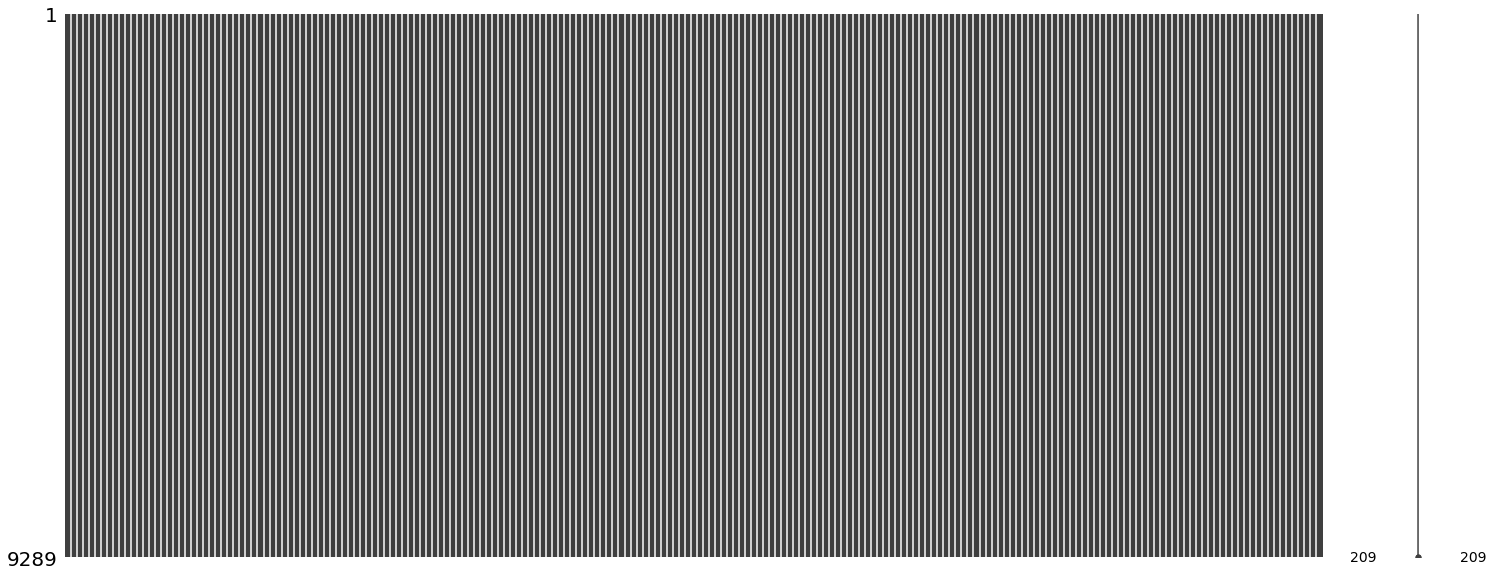

In [24]:
msno.matrix(delta_df)

[Back to Top](#top)

<a class="anchor" id="step-4"></a>

## Save Deltas Dataframe for Modeling

In [25]:
delta_df.to_csv('delta_df.csv', index = False)

[Back to Top](#top)